In [1]:
import json
import pickle
import urllib
from statistics import mean, median, stdev

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder

In [2]:
def autolabel(rects, significant):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in range(0, len(rects)):
        rect = rects[i]
        height = rect.get_height()
        if(significant[i] < (.005/len(significant))):
            annotation = '***'
        elif((significant[i] < (.01/len(significant)))):
            annotation = '**'
        elif((significant[i] < (.05/len(significant)))):
            annotation = '*'
        else:
            annotation = ''
        ax2.annotate(annotation,
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='center', color="black", fontsize=12, fontweight='bold')

In [3]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []

In [4]:
pValues = parser.load_obj('pvalues')
data = parser.load_obj('data')
labels = parser.load_obj('labels')

[  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165.
 168. 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207.
 210. 213. 216. 219. 222. 225. 228. 231. 234. 237. 240. 243. 246. 249.
 252. 255. 258. 261. 264. 267. 270. 273. 276. 279. 282. 285. 288. 291.
 294. 297. 300. 303. 306. 309. 312. 315. 318. 321. 324. 327. 330. 333.
 336. 339. 342. 345. 348. 351. 354. 357. 360. 363. 366. 369. 372. 375.
 378. 381. 384. 387. 390. 393. 396. 399. 402. 405. 408. 411. 414. 417.
 420. 423. 426. 429. 432. 435. 438. 441. 444. 447. 450. 453. 456. 459.
 462. 465.]


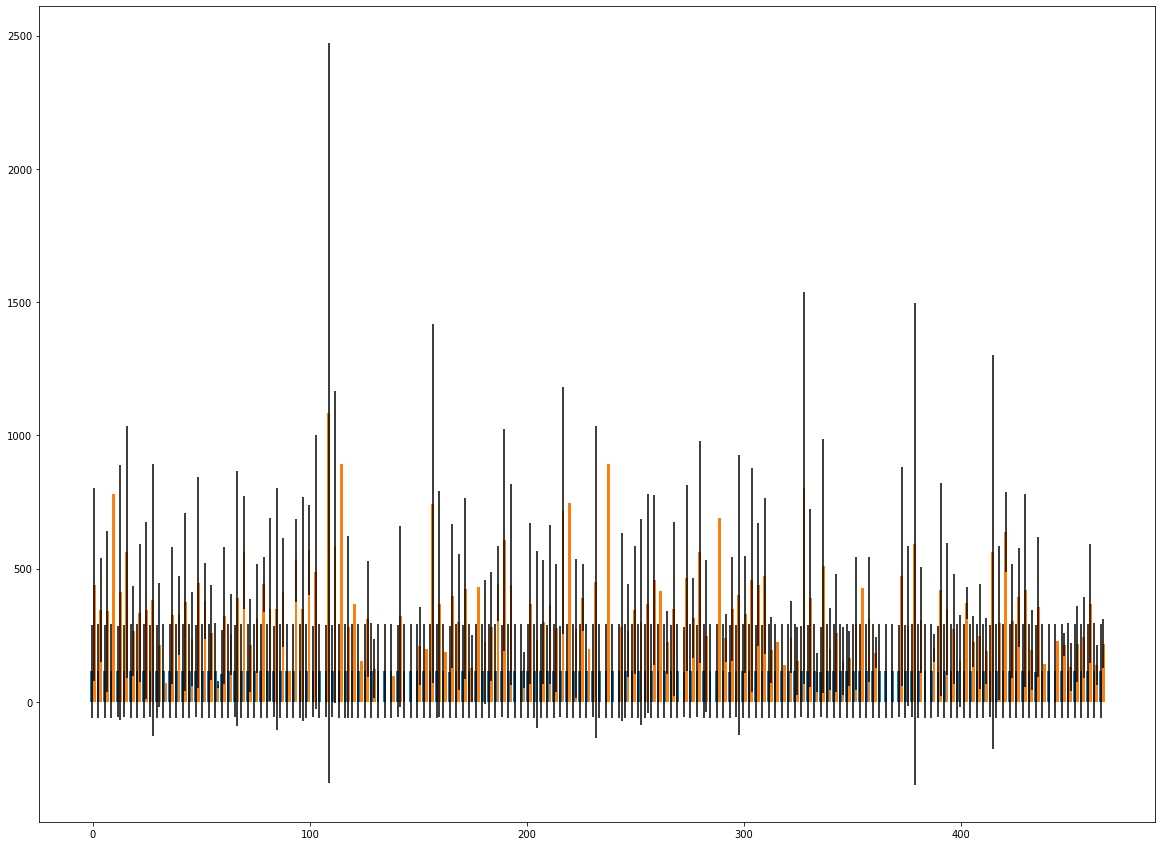

In [5]:
ind = np.arange(start=0, stop=len(data)*1.5, step=3)
width = 1.25  # the width of the bars
fig2, ax2 = plt.subplots(figsize=(20, 15))
means = []
stdevs = []
print(ind)
for dataset in data:
    means.append(mean(dataset))
for dataset in data:
    try:
        stdevs.append(stdev(dataset))
    except:
        stdevs.append(0)
rects1 = ax2.bar(ind-width/2, means[0::2], width,
                 label='WT Gene', yerr=stdevs[0::2], zorder=0)
rects2 = ax2.bar(ind + width/2, means[1::2], width,
                 label='MUT Gene', yerr=stdevs[1::2], zorder=0)

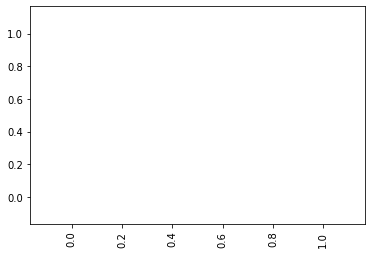

In [6]:
for i in range(0, len(ind)):
    # distribute scatter randomly across whole width of bar

    # ax2.scatter((ind[i]-width/2) + np.random.rand(len(data[i + i])) *
    #             width - width/2, data[i + i], color='black', zorder=10)
    ax2.scatter((ind[i]+width/2) + np.random.rand(len(data[i + i + 1])) *
                width - width/2, data[i + i + 1], color='black', zorder=10, s=10)
ax2.set_ylabel('Number of SVs')
ax2.set_title('Mean number of SVs in WT vs Mutant Genes')
ax2.set_xticks(ind)
ax2.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.scatter([], [], marker=r'$\ast$', label="p < .05",
            color='black', linestyle='None')
plt.scatter([], [], marker=r'$\ast\ast$', label="p < .01",
            color='black', linestyle='None', s=600)
plt.scatter([], [], marker=r'$\ast\ast\ast$',
            label="p < .005", color='black', linestyle='None', s=750)
ax2.legend()
autolabel(rects2, pValues)

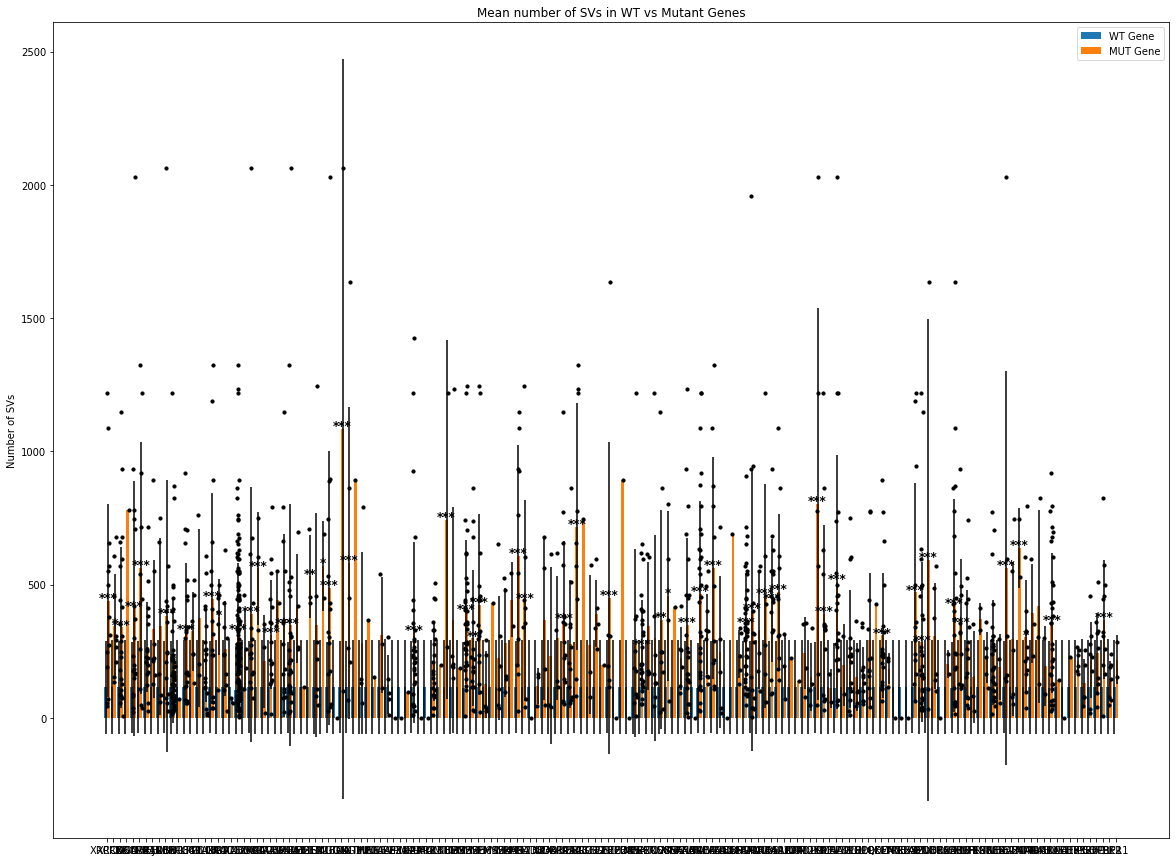

In [7]:
fig2

How to generate the data that was pickled

In [ ]:
samples = parser.samples
s = set()
inputs = []
counter = 0
for i in samples:
    for gene in samples[i]:
        if(gene in s):
            continue
        print(gene)
        if(not parser.checkValid(gene)):
            continue
        else:
            s.add(gene)
            inputs.append(gene)
            labels.append(gene)
pValues = []
for gene in inputs:
    print(gene)
    all_donors = df['donor_unique_id'].unique()
    donorsInGene = parser.getDonors(gene)
    diffDonors = parser.diff(all_donors, donorsInGene)

    affected = []
    notaffected = []

    for donor in donorsInGene:
        donorDF = df[(df['donor_unique_id'] == donor)]
        affected.append(len(donorDF.index))

    for donor in diffDonors:
        donorDF = df[(df['donor_unique_id'] == donor)]
        notaffected.append(len(donorDF.index))
    if(len(affected) == 0):
        affected.append(0)
    if(len(notaffected) == 0):
        notaffected.append(0)
    data.append(notaffected)
    data.append(affected)
    labels.append(gene)
    value = stats.ttest_ind(affected, notaffected)[1]
    pValues.append(value)
    print(value)